[Home](../../README.md)

### Model Evaluation

This is a demonstration of evaluating a model.

#### Step 1

Load the required dependencies.


In [1]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
import pickle

####  Step 2

Load the model for testing

In [2]:
filename = 'my_saved_model_v1.sav'
model_A = pickle.load(open(filename, 'rb'))


(Optional) Load a second model if you want to do comparative testing

In [3]:
filename = 'my_saved_model_v1.sav'
model_B = pickle.load(open(filename, 'rb'))

####  Step 3
Open and parse the test data CSV file and store the data as variable array data objects.

In [10]:
x_col = 'Temp'
testing_data = pd.read_csv('2.4.1.testing_data.csv')
x_test = np.array(testing_data[x_col]).reshape(-1,1)
y_test = np.array(testing_data['Count'])

#### Step 5

Plot the test data features, targets and linear regression model to visually evaluate the model.

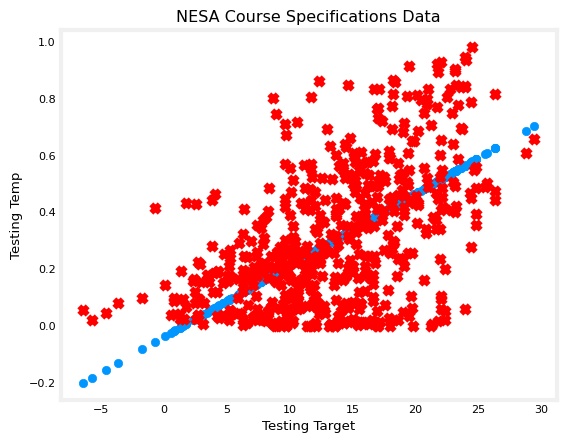

In [11]:
y_pred = model_A.predict(x_test)
plt.scatter(x_test, y_pred)
plt.scatter(x_test, y_test, marker='x', c='r')
plt.title("NESA Course Specifications Data")
plt.ylabel(f'Testing {x_col}')
plt.xlabel(f'Testing Target')
plt.show()

#### Step 6

Use the 'score' method of the `LinearRegression` class to return a score based evaluation of the models accuracy or performance.

In [5]:
test_score = model_A.score(x_test, y_test)
print(f'Training data score: {test_score}')

Training data score: 0.23973046511838203


#### Step 7

Manually calculate and evaluate the 'loss' and 'cost' of the model using the test data.

In [17]:
table = pd.DataFrame({
    testing_data.columns[0]: x_test.flatten(),  # Flatten x for easy display
    testing_data.columns[1]: y_test,
    'Predicted result':model_A.predict(x_test),
    'Loss' : y_test - model_A.predict(x_test).round(2)
})
print(table)
cost = table['Loss'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost}")

     Date     Count  Predicted result      Loss
0    19.1  0.419583          0.442277 -0.020417
1     7.7  0.188333          0.155092  0.028333
2    20.9  0.780000          0.487622  0.290000
3     9.2  0.231250          0.192880  0.041250
4    21.9  0.599167          0.512813  0.089167
..    ...       ...               ...       ...
539   5.9  0.164167          0.109747  0.054167
540  14.5  0.630417          0.326395  0.300417
541  15.4  0.004583          0.349068 -0.345417
542  20.8  0.340833          0.485103 -0.149167
543   8.0  0.019167          0.162650 -0.140833

[544 rows x 4 columns]
The cost or average loss of this model is 0.006148131127450958


You may want to do some manual predictions to understand your model.

In [18]:
print(model_A.predict([[0.1]]))
print(model_A.predict([[1]]))

[-0.03636427]
[-0.01369179]


#### Step 8

Evaluate the X axis intercept and gradient or coefficient of your model by using the getter methods to return the intercept and coefficient from my_model() object.

In [19]:
print(f'X Axis intercept: {model_A.intercept_}')
print(f'Coefficient: {model_A.coef_}')

X Axis intercept: -0.03888343061595401
Coefficient: [0.02519164]


#### Step 9. Multiple Variable Linear Regression

You should be able to understand the code snippets with less guidelines.

In [17]:
filename = 'my_saved_model_v2.sav'
model_C = pickle.load(open(filename, 'rb'))

In [15]:
# Optional
filename = 'my_saved_model_v2.sav'
model_D = pickle.load(open(filename, 'rb'))

In [13]:
mx_col = ['Temp','DewPointTemp','Humidity','WindSpeed']
testing_data = pd.read_csv('2.4.1.testing_data.csv')
mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['Count'])

In [20]:
my_pred = model_C.predict(mx_test)

# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(mx_col),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(mx_test[:,i],my_test, label = 'target')
    ax[i].set_xlabel(mx_col[i])
    ax[i].scatter(mx_test[:,i],my_pred,color="orange", label = 'predict')
    ax[i].set_ylabel("Count"); ax[i].legend();
fig.suptitle("Seoul Bike Demand Predictor")
plt.show()

ValueError: X has 4 features, but LinearRegression is expecting 2 features as input.

In [28]:
test_score = model_C.score(mx_test, my_test)
print(f'Training data score: {test_score}')

Training data score: 0.2269048611316572


In [ ]:
print(model_C.predict([[0.1,0.1,0.1]]))
print(model_C.predict([[1,0.5,1]]))

[-0.06612887]


ValueError: X has 3 features, but LinearRegression is expecting 2 features as input.

In [30]:
data = {col: mx_test[:, i] for i, col in enumerate(mx_col)}
data['Target'] = my_test
data['Predicted result'] = model_C.predict(mx_test)
data['Cost'] = my_test - model_C.predict(mx_test).round(2)

table = pd.DataFrame(data)
print(table)

     Temp  Humidity    Target  Predicted result      Cost
0    19.1      26.0  0.419583          0.468701 -0.050417
1     7.7      62.0  0.188333          0.131925  0.058333
2    20.9      34.0  0.780000          0.517661  0.260000
3     9.2      53.0  0.231250          0.177551  0.051250
4    21.9      55.0  0.599167          0.539760  0.059167
..    ...       ...       ...               ...       ...
539   5.9      69.0  0.164167          0.078345  0.084167
540  14.5      49.0  0.630417          0.330199  0.300417
541  15.4      96.0  0.004583          0.341432 -0.335417
542  20.8      50.0  0.340833          0.509875 -0.169167
543   8.0      95.0  0.019167          0.130330 -0.110833

[544 rows x 5 columns]


In [31]:
print(f'X Axis intercept: {model_C.intercept_}')
print(f'Coefficient: {model_C.coef_}')

X Axis intercept: -0.06895495780324512
Coefficient: [ 0.0285689  -0.00030807]


#### Step 10

When your model is ready for operations, move it to the [3.Operations\3.1.Deploy_Model](\3.Operations\3.1.Deploy_Model) folder.